In [ ]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast
import re

In [ ]:
# Read JSON Lines file
course_info =pd.read_json("/kaggle/input/lightmooccubex/entities/course.json", lines=True)
course_info

,id,name,field,prerequisites,about,resource
0,C_584313,《资治通鉴》导读,"[历史学, 中国语言文学]",,通过老师导读，同学们可深入这一经典文本内部，得以纵览千年历史，提升国学素养，体味人生智慧。,"[{'titles': ['第一课 导论与三家分晋', '导论', '导论'], 'reso..."
1,C_584329,微积分——极限理论与一元函数,"[应用经济学, 数学, 物理学, 理论经济学]",,本课程是理工科的一门数学基础课，系统、全面地介绍了一元函数微积分学。课程既保持了数学的严谨和...,"[{'titles': ['序言', '序言', '序言'], 'resource_id':..."
2,C_584381,新闻摄影,"[艺术学, 新闻传播学]",,掌握基本的摄影技能，了解图片新闻的工作方式，训练对生活的观察和热爱，发展对图像的审美和批评能...,"[{'titles': ['第一章 绪论', '第一讲 引言1', '引言1'], 'res..."
3,C_597208,数据挖掘：理论与算法,[计算机科学与技术],,最有趣的理论+最有用的算法=不得不学的数据科学。,"[{'titles': ['走进数据科学：博大精深，美不胜收', '整装待发', 'Vide..."
4,C_597225,大学计算机,[],,大学计算机课程将以计算思维为导向，以计算机原理、概念为基础，以新技术新方法为牵引，以创新思维...,"[{'titles': ['第1周： 基于计算机的问题求解', '课程介绍', '开篇'],..."
...,...,...,...,...,...,...
3776,C_2338076,（疾风计划）软件工程,[],,疾风计划2021【首期限额招募】进行中\n名校名师丨专属助教丨专业认证丨系统全面丨修炼内功丨...,"[{'titles': ['第1章 初识软件工程 ', '1.1 软件无处不在 ', '讲课..."
3777,C_2341259,（疾风计划）面向对象程序设计（C++）,[],,疾风计划2021【首期限额招募】进行中\n名校名师丨专属助教丨专业认证丨系统全面丨修炼内功丨...,"[{'titles': ['第一讲 课程简介与编程环境', '1.0 课程定位、教学内容',..."
3778,C_2337996,（疾风计划）数据结构(下),[],,疾风计划2021【首期限额招募】进行中\n名校名师丨专属助教丨专业认证丨系统全面丨修炼内功丨...,"[{'titles': ['第零章 ', '选课之前', '宣传片'], 'resourc..."
3779,C_1945689,机器学习训练营,[],,清华张敏老师带你12周掌握机器学习！8大经典算法 +7大实训 + 直播点评 + 博士助教+云...,"[{'titles': ['序-开营仪式及学习课件', None, '1.1_初识机器学习'..."


In [ ]:
course_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3781 entries, 0 to 3780
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             3781 non-null   object
 1   name           3781 non-null   object
 2   field          3781 non-null   object
 3   prerequisites  3779 non-null   object
 4   about          3779 non-null   object
 5   resource       3781 non-null   object
dtypes: object(6)
memory usage: 177.4+ KB


In [ ]:
course_info.shape

(3781, 6)

In [ ]:
filter_course_user =pd.read_csv("/kaggle/input/filter-course-by-user/filter_course_by_user.csv")
filter_course_user

,course_id
0,C_936971
1,C_696994
2,C_676932
3,C_697791
4,C_883345
...,...
3420,C_2141537
3421,C_1926748
3422,C_2342491
3423,C_2199259


In [ ]:
# Rename 'course_id' to 'id' in filter_course_user for merging
filter_course_user = filter_course_user.rename(columns={'course_id': 'id'})

# Perform inner join on 'id' to keep only matching rows
course_info = course_info.merge(filter_course_user, on='id', how='inner')
course_info

,id,name,field,prerequisites,about,resource
0,C_655852,系列课-已结课无回顾时长,[],,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第一周 绪论', '开场白', '开场白'], 'resourc..."
1,C_655850,系列课-开课未开始,[],,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第0章 Web前端技术概述', '0.1 Web诞生史', 'W..."
2,C_654554,系列课-开课中,[],,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['绪章 文化与文明概述', '0.1 导学', '导学'], 'r..."
3,C_654506,系列课-开课已结束有回顾时长,[],,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,[{'titles': ['学习贯彻“十九大精神”-引领中国特色社会主义进入新时代的政治宣言...
4,C_629558,医学免疫学与病原生物学,[],,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第一章 医学免疫学绪论', '谈谈免疫', 'Video'],..."
...,...,...,...,...,...,...
3010,C_2342518,客户关系管理,[],,本课程将带您置身华为、阿里、星巴克、海底捞、迪士尼等知名企业，看企业如何建立...,"[{'titles': ['项目一：走进客户关系管理', '1-1 客户关系是否要靠“搞关系..."
3011,C_2342532,Fundamentals of Circuit Analysis,[],Advanced Mathematics (1) 、Linear Algebra、Colle...,Want to learn Fundamentals of Circuit Analysis...,[{'titles': ['Chapter1 Basic Laws of Circuits'...
3012,C_2343056,运动训练基本原理与方法,[],先修运动训练学、运动解剖学、运动生理学、运动医学等基础课程。\t,运动训练基本原理与方法是体育学的专业核心课程，通过该课程的学习，学生不仅能够掌握运动训练的基...,"[{'titles': ['一、基础理论', '1.运动训练学及其理论体系', '1.运动训..."
3013,C_2343522,高等飞行动力学,[],飞行动力学、自动控制原理,评估飞机设计方案需要学什么？飞行动力学。 \n评估现代飞机设计方案需要学什么？高等飞行动力学。,"[{'titles': ['第1章 课程概述', '1.1 课程概述', '1.1.2 视频..."


In [ ]:
course_info = course_info.rename(columns={'id': 'course_id'})

In [ ]:
course_info

,course_id,name,field,prerequisites,about,resource
0,C_655852,系列课-已结课无回顾时长,[],,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第一周 绪论', '开场白', '开场白'], 'resourc..."
1,C_655850,系列课-开课未开始,[],,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第0章 Web前端技术概述', '0.1 Web诞生史', 'W..."
2,C_654554,系列课-开课中,[],,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['绪章 文化与文明概述', '0.1 导学', '导学'], 'r..."
3,C_654506,系列课-开课已结束有回顾时长,[],,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,[{'titles': ['学习贯彻“十九大精神”-引领中国特色社会主义进入新时代的政治宣言...
4,C_629558,医学免疫学与病原生物学,[],,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第一章 医学免疫学绪论', '谈谈免疫', 'Video'],..."
...,...,...,...,...,...,...
3010,C_2342518,客户关系管理,[],,本课程将带您置身华为、阿里、星巴克、海底捞、迪士尼等知名企业，看企业如何建立...,"[{'titles': ['项目一：走进客户关系管理', '1-1 客户关系是否要靠“搞关系..."
3011,C_2342532,Fundamentals of Circuit Analysis,[],Advanced Mathematics (1) 、Linear Algebra、Colle...,Want to learn Fundamentals of Circuit Analysis...,[{'titles': ['Chapter1 Basic Laws of Circuits'...
3012,C_2343056,运动训练基本原理与方法,[],先修运动训练学、运动解剖学、运动生理学、运动医学等基础课程。\t,运动训练基本原理与方法是体育学的专业核心课程，通过该课程的学习，学生不仅能够掌握运动训练的基...,"[{'titles': ['一、基础理论', '1.运动训练学及其理论体系', '1.运动训..."
3013,C_2343522,高等飞行动力学,[],飞行动力学、自动控制原理,评估飞机设计方案需要学什么？飞行动力学。 \n评估现代飞机设计方案需要学什么？高等飞行动力学。,"[{'titles': ['第1章 课程概述', '1.1 课程概述', '1.1.2 视频..."


In [ ]:
course_field =pd.read_json("/kaggle/input/lightmooccubex/relations/course-field.json", lines=True)
course_field

,course_id,course_name,field
0,584313,《资治通鉴》导读,"[中国语言文学, 历史学]"
1,681932,“做中学”Java程序设计,[计算机科学与技术]
2,674962,《红楼梦》的空间艺术,[中国语言文学]
3,682709,《纯粹理性批判》导论,[哲学]
4,682635,《统万城》导读,[历史学]
...,...,...,...
627,677102,走进性科学,[教育学]
628,677118,走近中华优秀传统文化,[社会学]
629,682442,组合数学,[数学]
630,697427,足球运动与科学,[体育学]


In [ ]:
# Flatten the list of fields and count occurrences
field_counts = pd.Series([field for sublist in course_field['field'] for field in sublist]).value_counts()

# Display field counts
print(field_counts)

计算机科学与技术       75
外国语言文学         43
艺术学            38
中国语言文学         26
管理科学与工程        25
               ..
战役学             1
军事后勤学与军事装备学     1
兵器科学与技术         1
军队指挥学           1
矿业工程            1
Name: count, Length: 82, dtype: int64


In [ ]:
# Convert Series to DataFrame
field_counts_df = field_counts.reset_index()
field_counts_df.columns = ["field", "count"]  # Rename columns

# Save to CSV
field_counts_df.to_csv("field_counts.csv", index=False, encoding="utf-8-sig")

In [ ]:
# Add "C_" prefix to course_id
course_field['course_id'] = 'C_' + course_field['course_id'].astype(str)
course_field

,course_id,course_name,field
0,C_584313,《资治通鉴》导读,"[中国语言文学, 历史学]"
1,C_681932,“做中学”Java程序设计,[计算机科学与技术]
2,C_674962,《红楼梦》的空间艺术,[中国语言文学]
3,C_682709,《纯粹理性批判》导论,[哲学]
4,C_682635,《统万城》导读,[历史学]
...,...,...,...
627,C_677102,走进性科学,[教育学]
628,C_677118,走近中华优秀传统文化,[社会学]
629,C_682442,组合数学,[数学]
630,C_697427,足球运动与科学,[体育学]


In [ ]:
# Merge with course_info on 'course_id'
course_info = course_info.merge(course_field[['course_id', 'field']], on='course_id', how='left')

# Display result
course_info

,course_id,name,field_x,prerequisites,about,resource,field_y
0,C_655852,系列课-已结课无回顾时长,[],,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第一周 绪论', '开场白', '开场白'], 'resourc...",NaN
1,C_655850,系列课-开课未开始,[],,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第0章 Web前端技术概述', '0.1 Web诞生史', 'W...",NaN
2,C_654554,系列课-开课中,[],,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['绪章 文化与文明概述', '0.1 导学', '导学'], 'r...",NaN
3,C_654506,系列课-开课已结束有回顾时长,[],,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,[{'titles': ['学习贯彻“十九大精神”-引领中国特色社会主义进入新时代的政治宣言...,NaN
4,C_629558,医学免疫学与病原生物学,[],,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第一章 医学免疫学绪论', '谈谈免疫', 'Video'],...",NaN
...,...,...,...,...,...,...,...
3010,C_2342518,客户关系管理,[],,本课程将带您置身华为、阿里、星巴克、海底捞、迪士尼等知名企业，看企业如何建立...,"[{'titles': ['项目一：走进客户关系管理', '1-1 客户关系是否要靠“搞关系...",NaN
3011,C_2342532,Fundamentals of Circuit Analysis,[],Advanced Mathematics (1) 、Linear Algebra、Colle...,Want to learn Fundamentals of Circuit Analysis...,[{'titles': ['Chapter1 Basic Laws of Circuits'...,NaN
3012,C_2343056,运动训练基本原理与方法,[],先修运动训练学、运动解剖学、运动生理学、运动医学等基础课程。\t,运动训练基本原理与方法是体育学的专业核心课程，通过该课程的学习，学生不仅能够掌握运动训练的基...,"[{'titles': ['一、基础理论', '1.运动训练学及其理论体系', '1.运动训...",NaN
3013,C_2343522,高等飞行动力学,[],飞行动力学、自动控制原理,评估飞机设计方案需要学什么？飞行动力学。 \n评估现代飞机设计方案需要学什么？高等飞行动力学。,"[{'titles': ['第1章 课程概述', '1.1 课程概述', '1.1.2 视频...",NaN


In [ ]:
course_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015 entries, 0 to 3014
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   course_id      3015 non-null   object
 1   name           3015 non-null   object
 2   field_x        3015 non-null   object
 3   prerequisites  3014 non-null   object
 4   about          3014 non-null   object
 5   resource       3015 non-null   object
 6   field_y        448 non-null    object
dtypes: object(7)
memory usage: 165.0+ KB


In [ ]:
type(course_info['field_y'][5])

list

In [ ]:
course_info[course_info['field_y'].notnull()]

,course_id,name,field_x,prerequisites,about,resource,field_y
5,C_629503,信息素养——学术研究的必修课（2019春）,[情报与档案管理],,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['week-1 信息素养与学术研究', '1.1 认识信息素养'...",[情报与档案管理]
6,C_597314,大学国文——北宋至现代文学赏析,[中国语言文学],,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第一章 北宋词（一）', '1.1 宋代的历史与文化', '1....",[中国语言文学]
7,C_674903,不朽的艺术：走进大师与经典,[艺术学],无,【国家精品课】以历史为经线，中外比较为纬线，以文化解读为主导，引导修课学生欣赏和理解中西艺术...,"[{'titles': ['第一讲：艺术概说：问题与方法', ' 1.图像与信息：事实缺损'...",[艺术学]
11,C_674920,逻辑学概论,[哲学],,“逻辑”是什么？大家都很熟悉却又似乎难以说清。本课程将告诉你：作为一门学科，逻辑学研究的是什...,"[{'titles': ['第一讲 什么是逻辑学', '1.1 “逻辑""和逻辑学', '默认...",[哲学]
14,C_674950,经济地理与企业兴衰,[地理学],,经济地理学是一门关于人为生存而抗争的地理学。它是现代地理学的重要分支，主要探讨企业的经济活动...,"[{'titles': ['第一章 大千世界：企业在哪里？', '第一节 大千世界', '1...",[地理学]
...,...,...,...,...,...,...,...
2885,C_697791,C++语言程序设计基础,[计算机科学与技术],,疾风计划2021【首期限额招募】进行中\n名校名师丨专属助教丨专业认证丨系统全面丨修炼内功丨...,"[{'titles': ['第1章 绪论', '导学 ', '第1章导学'], 'resou...",[计算机科学与技术]
2886,C_682189,面向对象程序设计（C++）,[计算机科学与技术],,疾风计划2021【首期限额招募】进行中\n名校名师丨专属助教丨专业认证丨系统全面丨修炼内功丨...,"[{'titles': ['第一讲 课程简介与编程环境', '1.0 课程定位、教学内容',...",[计算机科学与技术]
2888,C_735157,算法设计与分析,[计算机科学与技术],,疾风计划2021【首期限额招募】进行中\n名校名师丨专属助教丨专业认证丨系统全面丨修炼内功丨...,"[{'titles': ['1 Introduction of Algorithm', '...",[计算机科学与技术]
2889,C_677218,计算机网络,[计算机科学与技术],,疾风计划2021【首期限额招募】进行中\n名校名师丨专属助教丨专业认证丨系统全面丨修炼内功丨...,"[{'titles': ['第零章', '本课程简介', '课程组织'], 'resourc...",[计算机科学与技术]


In [ ]:
# Replace empty strings ("") with NaN
course_info.replace("[]", np.nan, inplace=True)
course_info.replace("", np.nan, inplace=True)
# Count null values in each column
null_counts = course_info.isnull().sum()
null_counts

course_id           0
name                0
field_x             0
prerequisites    1886
about               3
resource            0
field_y          2567
dtype: int64

In [ ]:
null_means = course_info.isnull().mean()
null_means

course_id        0.000000
name             0.000000
field_x          0.000000
prerequisites    0.625539
about            0.000995
resource         0.000000
field_y          0.851410
dtype: float64

In [ ]:
course_info['prerequisites'] = course_info['prerequisites'].apply(
    lambda x: [] if not isinstance(x, str) or '无' in x or not x.strip()
    else re.split(r'[、, ，]', x)
)
# Display processed DataFrame
course_info

,course_id,name,field_x,prerequisites,about,resource,field_y
0,C_655852,系列课-已结课无回顾时长,[],[],目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第一周 绪论', '开场白', '开场白'], 'resourc...",NaN
1,C_655850,系列课-开课未开始,[],[],目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第0章 Web前端技术概述', '0.1 Web诞生史', 'W...",NaN
2,C_654554,系列课-开课中,[],[],目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['绪章 文化与文明概述', '0.1 导学', '导学'], 'r...",NaN
3,C_654506,系列课-开课已结束有回顾时长,[],[],目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,[{'titles': ['学习贯彻“十九大精神”-引领中国特色社会主义进入新时代的政治宣言...,NaN
4,C_629558,医学免疫学与病原生物学,[],[],目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第一章 医学免疫学绪论', '谈谈免疫', 'Video'],...",NaN
...,...,...,...,...,...,...,...
3010,C_2342518,客户关系管理,[],[],本课程将带您置身华为、阿里、星巴克、海底捞、迪士尼等知名企业，看企业如何建立...,"[{'titles': ['项目一：走进客户关系管理', '1-1 客户关系是否要靠“搞关系...",NaN
3011,C_2342532,Fundamentals of Circuit Analysis,[],"[Advanced, Mathematics, (1), , Linear, Algebra...",Want to learn Fundamentals of Circuit Analysis...,[{'titles': ['Chapter1 Basic Laws of Circuits'...,NaN
3012,C_2343056,运动训练基本原理与方法,[],"[先修运动训练学, 运动解剖学, 运动生理学, 运动医学等基础课程。\t]",运动训练基本原理与方法是体育学的专业核心课程，通过该课程的学习，学生不仅能够掌握运动训练的基...,"[{'titles': ['一、基础理论', '1.运动训练学及其理论体系', '1.运动训...",NaN
3013,C_2343522,高等飞行动力学,[],"[飞行动力学, 自动控制原理]",评估飞机设计方案需要学什么？飞行动力学。 \n评估现代飞机设计方案需要学什么？高等飞行动力学。,"[{'titles': ['第1章 课程概述', '1.1 课程概述', '1.1.2 视频...",NaN


In [ ]:
type(course_info["field_x"][0])

list

In [ ]:
course_info[course_info['field_y'].notnull()]

,course_id,name,field_x,prerequisites,about,resource,field_y
5,C_629503,信息素养——学术研究的必修课（2019春）,[情报与档案管理],[],目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['week-1 信息素养与学术研究', '1.1 认识信息素养'...",[情报与档案管理]
6,C_597314,大学国文——北宋至现代文学赏析,[中国语言文学],[],目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第一章 北宋词（一）', '1.1 宋代的历史与文化', '1....",[中国语言文学]
7,C_674903,不朽的艺术：走进大师与经典,[艺术学],[],【国家精品课】以历史为经线，中外比较为纬线，以文化解读为主导，引导修课学生欣赏和理解中西艺术...,"[{'titles': ['第一讲：艺术概说：问题与方法', ' 1.图像与信息：事实缺损'...",[艺术学]
11,C_674920,逻辑学概论,[哲学],[],“逻辑”是什么？大家都很熟悉却又似乎难以说清。本课程将告诉你：作为一门学科，逻辑学研究的是什...,"[{'titles': ['第一讲 什么是逻辑学', '1.1 “逻辑""和逻辑学', '默认...",[哲学]
14,C_674950,经济地理与企业兴衰,[地理学],[],经济地理学是一门关于人为生存而抗争的地理学。它是现代地理学的重要分支，主要探讨企业的经济活动...,"[{'titles': ['第一章 大千世界：企业在哪里？', '第一节 大千世界', '1...",[地理学]
...,...,...,...,...,...,...,...
2885,C_697791,C++语言程序设计基础,[计算机科学与技术],[],疾风计划2021【首期限额招募】进行中\n名校名师丨专属助教丨专业认证丨系统全面丨修炼内功丨...,"[{'titles': ['第1章 绪论', '导学 ', '第1章导学'], 'resou...",[计算机科学与技术]
2886,C_682189,面向对象程序设计（C++）,[计算机科学与技术],[],疾风计划2021【首期限额招募】进行中\n名校名师丨专属助教丨专业认证丨系统全面丨修炼内功丨...,"[{'titles': ['第一讲 课程简介与编程环境', '1.0 课程定位、教学内容',...",[计算机科学与技术]
2888,C_735157,算法设计与分析,[计算机科学与技术],[],疾风计划2021【首期限额招募】进行中\n名校名师丨专属助教丨专业认证丨系统全面丨修炼内功丨...,"[{'titles': ['1 Introduction of Algorithm', '...",[计算机科学与技术]
2889,C_677218,计算机网络,[计算机科学与技术],[],疾风计划2021【首期限额招募】进行中\n名校名师丨专属助教丨专业认证丨系统全面丨修炼内功丨...,"[{'titles': ['第零章', '本课程简介', '课程组织'], 'resourc...",[计算机科学与技术]


In [ ]:
course_info['num_prerequisites'] = course_info['prerequisites'].apply(len)
course_info

,course_id,name,field_x,prerequisites,about,resource,field_y,num_prerequisites
0,C_655852,系列课-已结课无回顾时长,[],[],目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第一周 绪论', '开场白', '开场白'], 'resourc...",NaN,0
1,C_655850,系列课-开课未开始,[],[],目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第0章 Web前端技术概述', '0.1 Web诞生史', 'W...",NaN,0
2,C_654554,系列课-开课中,[],[],目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['绪章 文化与文明概述', '0.1 导学', '导学'], 'r...",NaN,0
3,C_654506,系列课-开课已结束有回顾时长,[],[],目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,[{'titles': ['学习贯彻“十九大精神”-引领中国特色社会主义进入新时代的政治宣言...,NaN,0
4,C_629558,医学免疫学与病原生物学,[],[],目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第一章 医学免疫学绪论', '谈谈免疫', 'Video'],...",NaN,0
...,...,...,...,...,...,...,...,...
3010,C_2342518,客户关系管理,[],[],本课程将带您置身华为、阿里、星巴克、海底捞、迪士尼等知名企业，看企业如何建立...,"[{'titles': ['项目一：走进客户关系管理', '1-1 客户关系是否要靠“搞关系...",NaN,0
3011,C_2342532,Fundamentals of Circuit Analysis,[],"[Advanced, Mathematics, (1), , Linear, Algebra...",Want to learn Fundamentals of Circuit Analysis...,[{'titles': ['Chapter1 Basic Laws of Circuits'...,NaN,10
3012,C_2343056,运动训练基本原理与方法,[],"[先修运动训练学, 运动解剖学, 运动生理学, 运动医学等基础课程。\t]",运动训练基本原理与方法是体育学的专业核心课程，通过该课程的学习，学生不仅能够掌握运动训练的基...,"[{'titles': ['一、基础理论', '1.运动训练学及其理论体系', '1.运动训...",NaN,4
3013,C_2343522,高等飞行动力学,[],"[飞行动力学, 自动控制原理]",评估飞机设计方案需要学什么？飞行动力学。 \n评估现代飞机设计方案需要学什么？高等飞行动力学。,"[{'titles': ['第1章 课程概述', '1.1 课程概述', '1.1.2 视频...",NaN,2


In [ ]:
course_info['num_prerequisites'].value_counts()

num_prerequisites
0      2238
1       215
2       157
3       122
4        65
5        41
6        27
7        17
9        16
8        14
13       10
10       10
12        8
16        8
11        7
23        6
15        6
14        6
22        5
21        3
20        3
19        3
17        2
18        2
48        2
41        2
25        2
24        2
30        1
141       1
36        1
29        1
26        1
191       1
51        1
32        1
39        1
59        1
55        1
27        1
63        1
28        1
42        1
61        1
Name: count, dtype: int64

In [ ]:
course_info['num_field_x'] = course_info['field_x'].apply(len)
course_info

,course_id,name,field_x,prerequisites,about,resource,field_y,num_prerequisites,num_field_x
0,C_655852,系列课-已结课无回顾时长,[],[],目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第一周 绪论', '开场白', '开场白'], 'resourc...",NaN,0,0
1,C_655850,系列课-开课未开始,[],[],目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第0章 Web前端技术概述', '0.1 Web诞生史', 'W...",NaN,0,0
2,C_654554,系列课-开课中,[],[],目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['绪章 文化与文明概述', '0.1 导学', '导学'], 'r...",NaN,0,0
3,C_654506,系列课-开课已结束有回顾时长,[],[],目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,[{'titles': ['学习贯彻“十九大精神”-引领中国特色社会主义进入新时代的政治宣言...,NaN,0,0
4,C_629558,医学免疫学与病原生物学,[],[],目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第一章 医学免疫学绪论', '谈谈免疫', 'Video'],...",NaN,0,0
...,...,...,...,...,...,...,...,...,...
3010,C_2342518,客户关系管理,[],[],本课程将带您置身华为、阿里、星巴克、海底捞、迪士尼等知名企业，看企业如何建立...,"[{'titles': ['项目一：走进客户关系管理', '1-1 客户关系是否要靠“搞关系...",NaN,0,0
3011,C_2342532,Fundamentals of Circuit Analysis,[],"[Advanced, Mathematics, (1), , Linear, Algebra...",Want to learn Fundamentals of Circuit Analysis...,[{'titles': ['Chapter1 Basic Laws of Circuits'...,NaN,10,0
3012,C_2343056,运动训练基本原理与方法,[],"[先修运动训练学, 运动解剖学, 运动生理学, 运动医学等基础课程。\t]",运动训练基本原理与方法是体育学的专业核心课程，通过该课程的学习，学生不仅能够掌握运动训练的基...,"[{'titles': ['一、基础理论', '1.运动训练学及其理论体系', '1.运动训...",NaN,4,0
3013,C_2343522,高等飞行动力学,[],"[飞行动力学, 自动控制原理]",评估飞机设计方案需要学什么？飞行动力学。 \n评估现代飞机设计方案需要学什么？高等飞行动力学。,"[{'titles': ['第1章 课程概述', '1.1 课程概述', '1.1.2 视频...",NaN,2,0


In [ ]:
course_info['num_field_x'].value_counts()

num_field_x
0    2567
1     352
2      82
3      12
4       1
7       1
Name: count, dtype: int64

In [ ]:
# Drop 'field_y' column
course_info = course_info.drop(columns=['field_y'])

# Rearrange columns
desired_order = ['course_id', 'name', 'field_x', 'num_field_x', 'prerequisites', 'num_prerequisites', 'about', 'resource']
course_info = course_info[desired_order]

# Display updated Datcourse_info

In [ ]:
course_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015 entries, 0 to 3014
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   course_id          3015 non-null   object
 1   name               3015 non-null   object
 2   field_x            3015 non-null   object
 3   num_field_x        3015 non-null   int64 
 4   prerequisites      3015 non-null   object
 5   num_prerequisites  3015 non-null   int64 
 6   about              3012 non-null   object
 7   resource           3015 non-null   object
dtypes: int64(2), object(6)
memory usage: 188.6+ KB


In [ ]:
course_info[course_info['about'].isna()]

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource
802,C_697167,全能游戏原画师的武功秘籍,[],0,[],0,NaN,"[{'titles': ['一、人体结构及动态人体结构绘制基础课程', '1、艺用人体结构技..."
1116,C_789961,Studio测试资源勿删,[],0,[111],1,NaN,"[{'titles': ['移动端考试- 小程序12', None, 'asdf'], 'r..."
1400,C_674938,自我认知与情绪管理,[],0,[],0,None,"[{'titles': ['第1章 绪论', '1.1 课程导论', '课程视频'], 'r..."


In [ ]:
course_info.to_csv("course_info.csv", index=False, encoding="utf-8-sig")

## Resource

In [ ]:
course_info_exploded = course_info.explode("resource")
course_info_exploded

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource
0,C_655852,系列课-已结课无回顾时长,[],0,[],0,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"{'titles': ['第一周 绪论', '开场白', '开场白'], 'resource..."
0,C_655852,系列课-已结课无回顾时长,[],0,[],0,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"{'titles': ['第一周 绪论', '绪论', '绪论'], 'resource_i..."
0,C_655852,系列课-已结课无回顾时长,[],0,[],0,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"{'titles': ['第一周 绪论', None, '绪论课堂小测'], 'resour..."
0,C_655852,系列课-已结课无回顾时长,[],0,[],0,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"{'titles': ['第一周 绪论', None, '绪论--绪论测试题'], 'res..."
0,C_655852,系列课-已结课无回顾时长,[],0,[],0,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"{'titles': ['第一周1中医理论-阴阳五行', '1.1阴阳学说', '1.1阴阳..."
...,...,...,...,...,...,...,...,...
3014,C_1945689,机器学习训练营,[],0,[],0,清华张敏老师带你12周掌握机器学习！8大经典算法 +7大实训 + 直播点评 + 博士助教+云...,"{'titles': ['深度学习基础', None, '10.2.4_深度学习应用'], ..."
3014,C_1945689,机器学习训练营,[],0,[],0,清华张敏老师带你12周掌握机器学习！8大经典算法 +7大实训 + 直播点评 + 博士助教+云...,"{'titles': ['深度学习基础', None, 'ML18随堂练习'], 'reso..."
3014,C_1945689,机器学习训练营,[],0,[],0,清华张敏老师带你12周掌握机器学习！8大经典算法 +7大实训 + 直播点评 + 博士助教+云...,"{'titles': ['基于群体智慧的机器学习数据集构建', None, '11.1_基于..."
3014,C_1945689,机器学习训练营,[],0,[],0,清华张敏老师带你12周掌握机器学习！8大经典算法 +7大实训 + 直播点评 + 博士助教+云...,"{'titles': ['基于群体智慧的机器学习数据集构建', None, 'ML19随堂练..."


In [ ]:
id_counts = course_info_exploded.groupby('course_id').size()
id_counts

course_id
C_1017355     38
C_1017419     26
C_1025064    103
C_1025076     47
C_1025079     39
            ... 
C_949542      64
C_955163     108
C_956128      34
C_956129      96
C_956130      86
Length: 3015, dtype: int64

In [ ]:
id_counts.describe()

count    3015.000000
mean       74.241791
std        78.016287
min         1.000000
25%        41.000000
50%        61.000000
75%        89.000000
max      2728.000000
dtype: float64

Phân tích số liệu:
- Min = 1 → Có những khóa học rất ít tài nguyên, có thể do lỗi dữ liệu hoặc không hữu ích.

- Max = 2728 → Có một số khóa học có tài nguyên cực lớn, có thể là ngoại lệ.

- Mean = 74.24 → Giá trị trung bình khá hợp lý.

- 50% (Median) = 61 → Một nửa khóa học có tài nguyên ≤ 61.

- 75% (Q3) = 89 → 75% khóa học có tài nguyên ≤ 89.

- Std (Độ lệch chuẩn) = 78.01 → Khoảng cách giữa các giá trị khá lớn.

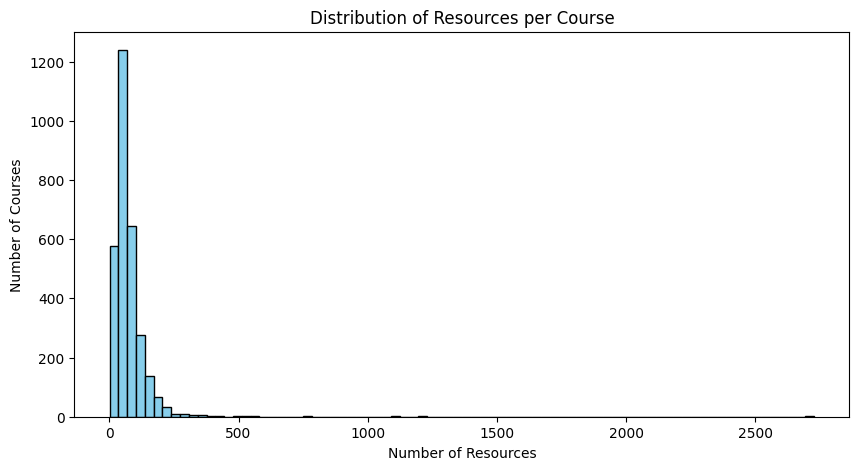

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(id_counts, bins=80, color='skyblue', edgecolor='black')

plt.xlabel("Number of Resources")
plt.ylabel("Number of Courses")
plt.title("Distribution of Resources per Course")

plt.show()

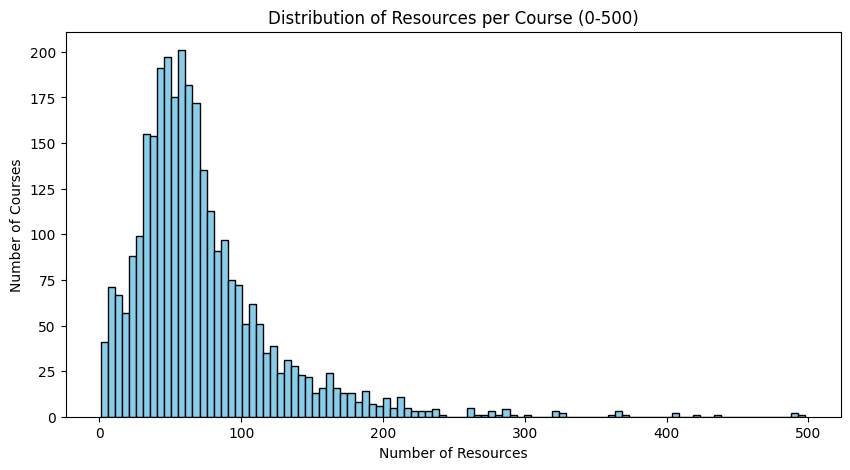

In [ ]:
# Filter counts between 0 and 500
filtered_counts = id_counts[(id_counts > 0) & (id_counts <= 500)]

plt.figure(figsize=(10, 5))
plt.hist(filtered_counts, bins=100, color='skyblue', edgecolor='black')

plt.xlabel("Number of Resources")
plt.ylabel("Number of Courses")
plt.title("Distribution of Resources per Course (0-500)")

plt.show()

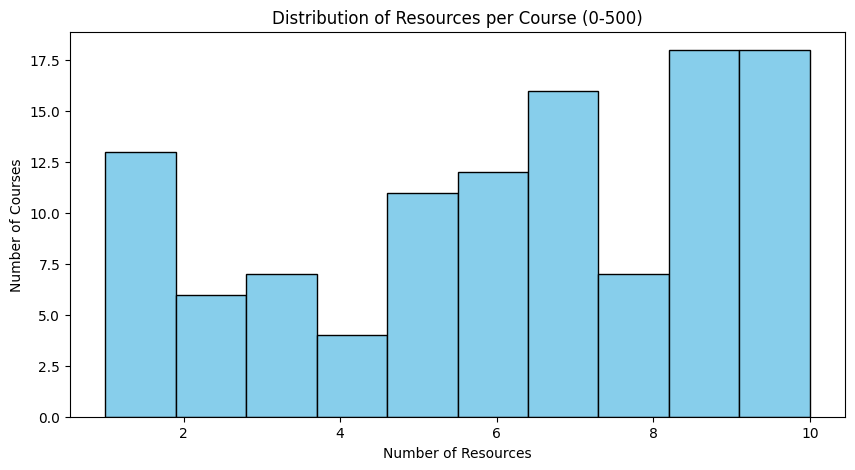

In [ ]:
# Filter counts between 0 and 500
filtered_counts = id_counts[(id_counts > 0) & (id_counts <= 10)]

plt.figure(figsize=(10, 5))
plt.hist(filtered_counts, bins=10, color='skyblue', edgecolor='black')

plt.xlabel("Number of Resources")
plt.ylabel("Number of Courses")
plt.title("Distribution of Resources per Course (0-500)")

plt.show()

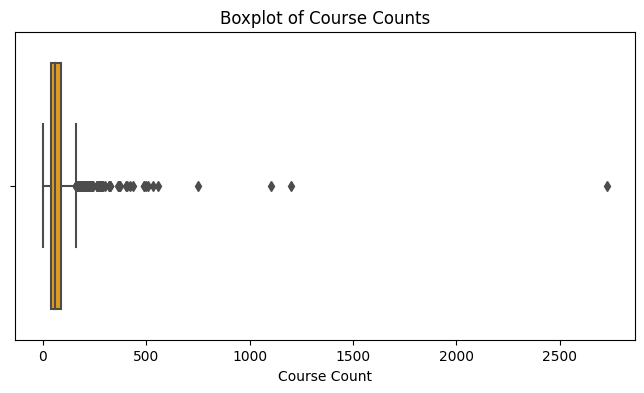

In [ ]:
# Boxplot to visualize outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=id_counts, color='orange')
plt.xlabel("Course Count")
plt.title("Boxplot of Course Counts")
plt.show()

- Giới hạn tài nguyên của khóa học
1. Số lượng tài nguyên không quá lớn => để học viên có thể hoàn thành
2. Số lượng tài nguyên không quá ít => để tránh trường hợp sinh viên hoàn thành khóa học trước khi dự đoán

1. Giới hạn dưới (Low Threshold)

Loại bỏ các khóa học có tài nguyên quá ít:

- Nếu muốn loại bỏ các khóa học có quá ít tài nguyên, chọn Q1 (25%) = 41 là hợp lý.

- Nếu muốn chặt hơn, có thể chọn min = 10 (loại bỏ những khóa học gần như không có nội dung).

2. Giới hạn trên (High Threshold)

Loại bỏ các khóa học có tài nguyên quá nhiều (có thể là outlier):

- Chọn Q3 + 1.5 × IQR để loại bỏ outliers:

IQR = Q3 - Q1 = 89 - 41 = 48

Ngưỡng trên = 89 + 1.5 × 48 = 161

=> Giới hạn tối đa khoảng 150 - 200 tài nguyên là hợp lý.

In [ ]:
# Tạo danh sách các quantiles mong muốn
quantiles = [i / 100 for i in range(5, 101, 5)]  # [0.05, 0.10, 0.15, ..., 1.00]

# Tính toán các quantiles cho id_counts
quantile_values = id_counts.quantile(quantiles)

# Hiển thị kết quantile_values
quantile_values

0.05      13.0
0.10      24.0
0.15      31.0
0.20      36.0
0.25      41.0
0.30      45.0
0.35      49.0
0.40      53.0
0.45      57.0
0.50      61.0
0.55      65.0
0.60      69.0
0.65      74.0
0.70      81.0
0.75      89.0
0.80      99.0
0.85     112.0
0.90     134.0
0.95     168.0
1.00    2728.0
dtype: float64

In [ ]:
low_threshold = 13
high_threshold = 168

filtered_course_ids = id_counts[(id_counts >= low_threshold) & (id_counts <= high_threshold)].index
filtered_course_ids

Index(['C_1017355', 'C_1017419', 'C_1025064', 'C_1025076', 'C_1025079',
       'C_1073350', 'C_1123814', 'C_1123848', 'C_1123944', 'C_1123979',
       ...
       'C_948486', 'C_948488', 'C_949439', 'C_949540', 'C_949541', 'C_949542',
       'C_955163', 'C_956128', 'C_956129', 'C_956130'],
      dtype='object', name='course_id', length=2718)

In [ ]:
len(filtered_course_ids)

2718

In [ ]:
# Keep only rows in course_info that match the filtered course IDs
filtered_courses = course_info_exploded[course_info_exploded['course_id'].isin(filtered_course_ids)]
filtered_courses

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource
0,C_655852,系列课-已结课无回顾时长,[],0,[],0,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"{'titles': ['第一周 绪论', '开场白', '开场白'], 'resource..."
0,C_655852,系列课-已结课无回顾时长,[],0,[],0,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"{'titles': ['第一周 绪论', '绪论', '绪论'], 'resource_i..."
0,C_655852,系列课-已结课无回顾时长,[],0,[],0,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"{'titles': ['第一周 绪论', None, '绪论课堂小测'], 'resour..."
0,C_655852,系列课-已结课无回顾时长,[],0,[],0,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"{'titles': ['第一周 绪论', None, '绪论--绪论测试题'], 'res..."
0,C_655852,系列课-已结课无回顾时长,[],0,[],0,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"{'titles': ['第一周1中医理论-阴阳五行', '1.1阴阳学说', '1.1阴阳..."
...,...,...,...,...,...,...,...,...
3014,C_1945689,机器学习训练营,[],0,[],0,清华张敏老师带你12周掌握机器学习！8大经典算法 +7大实训 + 直播点评 + 博士助教+云...,"{'titles': ['深度学习基础', None, '10.2.4_深度学习应用'], ..."
3014,C_1945689,机器学习训练营,[],0,[],0,清华张敏老师带你12周掌握机器学习！8大经典算法 +7大实训 + 直播点评 + 博士助教+云...,"{'titles': ['深度学习基础', None, 'ML18随堂练习'], 'reso..."
3014,C_1945689,机器学习训练营,[],0,[],0,清华张敏老师带你12周掌握机器学习！8大经典算法 +7大实训 + 直播点评 + 博士助教+云...,"{'titles': ['基于群体智慧的机器学习数据集构建', None, '11.1_基于..."
3014,C_1945689,机器学习训练营,[],0,[],0,清华张敏老师带你12周掌握机器学习！8大经典算法 +7大实训 + 直播点评 + 博士助教+云...,"{'titles': ['基于群体智慧的机器学习数据集构建', None, 'ML19随堂练..."


In [ ]:
filtered_courses["resource_id"] = filtered_courses["resource"].apply(lambda x: x.get("resource_id") if isinstance(x, dict) else None)
filtered_courses["resource_chapter"] = filtered_courses["resource"].apply(lambda x: x.get("chapter") if isinstance(x, dict) else None)

<ipython-input-41-25ed15a904ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_courses["resource_id"] = filtered_courses["resource"].apply(lambda x: x.get("resource_id") if isinstance(x, dict) else None)
<ipython-input-41-25ed15a904ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_courses["resource_chapter"] = filtered_courses["resource"].apply(lambda x: x.get("chapter") if isinstance(x, dict) else None)


In [ ]:
filtered_courses = filtered_courses.reset_index(drop=True)
filtered_courses

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,resource_id,resource_chapter
0,C_655852,系列课-已结课无回顾时长,[],0,[],0,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"{'titles': ['第一周 绪论', '开场白', '开场白'], 'resource...",V_32148,1.1.1
1,C_655852,系列课-已结课无回顾时长,[],0,[],0,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"{'titles': ['第一周 绪论', '绪论', '绪论'], 'resource_i...",V_32151,1.2.1
2,C_655852,系列课-已结课无回顾时长,[],0,[],0,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"{'titles': ['第一周 绪论', None, '绪论课堂小测'], 'resour...",Ex_32152,1.3
3,C_655852,系列课-已结课无回顾时长,[],0,[],0,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"{'titles': ['第一周 绪论', None, '绪论--绪论测试题'], 'res...",Ex_32153,1.4
4,C_655852,系列课-已结课无回顾时长,[],0,[],0,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"{'titles': ['第一周1中医理论-阴阳五行', '1.1阴阳学说', '1.1阴阳...",V_32154,2.1.1
...,...,...,...,...,...,...,...,...,...,...
182861,C_1945689,机器学习训练营,[],0,[],0,清华张敏老师带你12周掌握机器学习！8大经典算法 +7大实训 + 直播点评 + 博士助教+云...,"{'titles': ['深度学习基础', None, '10.2.4_深度学习应用'], ...",V_7765245,10.5
182862,C_1945689,机器学习训练营,[],0,[],0,清华张敏老师带你12周掌握机器学习！8大经典算法 +7大实训 + 直播点评 + 博士助教+云...,"{'titles': ['深度学习基础', None, 'ML18随堂练习'], 'reso...",Ex_8082421,10.6
182863,C_1945689,机器学习训练营,[],0,[],0,清华张敏老师带你12周掌握机器学习！8大经典算法 +7大实训 + 直播点评 + 博士助教+云...,"{'titles': ['基于群体智慧的机器学习数据集构建', None, '11.1_基于...",V_7768867,11
182864,C_1945689,机器学习训练营,[],0,[],0,清华张敏老师带你12周掌握机器学习！8大经典算法 +7大实训 + 直播点评 + 博士助教+云...,"{'titles': ['基于群体智慧的机器学习数据集构建', None, 'ML19随堂练...",Ex_8082422,11.1


In [ ]:
course_resource_id = filtered_courses[['course_id', 'resource_id']]
course_resource_id

,course_id,resource_id
0,C_655852,V_32148
1,C_655852,V_32151
2,C_655852,Ex_32152
3,C_655852,Ex_32153
4,C_655852,V_32154
...,...,...
182861,C_1945689,V_7765245
182862,C_1945689,Ex_8082421
182863,C_1945689,V_7768867
182864,C_1945689,Ex_8082422


In [ ]:
course_resource_id.to_csv("course_resource_id.csv", index=False, encoding="utf-8-sig")

In [ ]:
# Group by 'id' and separate Videos and Exercises
grouped_course = filtered_courses.groupby('course_id').agg(
    resource_id_video=('resource_id', lambda x: list(x[x.str.startswith('V')])),
    chapter_video=('resource_chapter', lambda x: list(x[filtered_courses['resource_id'].str.startswith('V')])),
    resource_id_ex=('resource_id', lambda x: list(x[x.str.startswith('Ex')])),
    chapter_ex=('resource_chapter', lambda x: list(x[filtered_courses['resource_id'].str.startswith('Ex')]))
).reset_index()
grouped_course

,course_id,resource_id_video,chapter_video,resource_id_ex,chapter_ex
0,C_1017355,"[V_1617852, V_1617854, V_1736570, V_1736573, V...","[0, 0.1, 1, 1.1, 1.1.1, 1.2.1, 2, 2.1, 3, 3.1,...","[Ex_1617853, Ex_1617855, Ex_1736572, Ex_173657...","[0.1, 0.1.1, 1.1, 1.1.1, 1.1.2, 1.2.2, 2.1, 2...."
1,C_1017419,"[V_1618247, V_1618249, V_1618250, V_1618252, V...","[1.2, 2.1, 2.2, 3.1, 3.2, 4.1, 4.2, 5.1, 5.2, ...","[Ex_1618248, Ex_1618251, Ex_1618254, Ex_161825...","[1.3, 2.3, 3.3, 4.3, 5.3, 6.3, 7.3, 8.3, 9.3]"
2,C_1025064,"[V_1622546, V_1622547, V_1622548, V_1622549, V...","[0, 0.1, 0.2, 0.3, 0.3.1, 0.3.2, 0.4, 0.5, 1, ...","[Ex_1622556, Ex_1622566, Ex_1622574, Ex_162258...","[0.6, 1.7, 2.4, 3.2, 4.4, 5.3, 6.4, 7.4, 8.3, ..."
3,C_1025076,"[V_1622858, V_1622859, V_1622860, V_1622861, V...","[0, 0.1, 0.2, 0.3, 0.2, 0.2.1, 0.2.2, 0.2.3, 0...","[Ex_1622870, Ex_1622875, Ex_1622876, Ex_1622889]","[0.2.6, 1.2, 1.3, 2.11]"
4,C_1025079,"[V_1622989, V_1622990, V_1622991, V_1622992, V...","[1.1.1, 1.2.1, 1.3.1, 1.4.1, 2.1.1, 2.2.1, 2.3...","[Ex_1622993, Ex_1623006, Ex_1623011, Ex_162302...","[1.5, 4.5, 5.5, 7.5, 8.3]"
...,...,...,...,...,...
2713,C_949542,"[V_1505188, V_1505190, V_1505192, V_1505194, V...","[0, 0.1, 0.2, 1, 1.1, 1.2, 2, 2.1, 2.2, 2.3, 2...","[Ex_1505189, Ex_1505191, Ex_1505193, Ex_150519...","[0.1, 0.1.1, 0.2.1, 1.1, 1.1.1, 1.2.1, 2.1, 2...."
2714,C_955163,"[V_1542335, V_1542336, V_1542337, V_1542338, V...","[0, 0.1, 0.2, 0.3, 1, 2, 2.1, 2.2, 2.3, 2.4, 2...","[Ex_1576375, Ex_1576376, Ex_1545423, Ex_154542...","[0.4, 1.1, 2.19, 3.21, 4.43, 5.12, 6.1]"
2715,C_956128,"[V_1555005, V_1555006, V_1555007, V_1555010, V...","[0, 0.1, 0.3, 1, 1.1, 1.2, 1.4, 2, 2.1, 2.2, 2...","[Ex_1555008, Ex_1555014, Ex_1555021, Ex_155502...","[0.2, 1.3, 2.4, 3.3, 4.3, 5.2, 6.3]"
2716,C_956129,"[V_1555097, V_1555098, V_1555099, V_1555100, V...","[0, 0.1, 0.2, 0.3, 0.1, 0.1.1, 0.1.2, 0.2, 0.2...","[Ex_1555101, Ex_1555106, Ex_1555114, Ex_155511...","[0.5, 0.1.4, 0.2.7, 0.3.3, 1.5, 1.1.2, 1.2.5, ..."


In [ ]:
grouped_course['video_count'] = grouped_course['resource_id_video'].apply(len)
grouped_course['exercise_count'] = grouped_course['resource_id_ex'].apply(len)
grouped_course

,course_id,resource_id_video,chapter_video,resource_id_ex,chapter_ex,video_count,exercise_count
0,C_1017355,"[V_1617852, V_1617854, V_1736570, V_1736573, V...","[0, 0.1, 1, 1.1, 1.1.1, 1.2.1, 2, 2.1, 3, 3.1,...","[Ex_1617853, Ex_1617855, Ex_1736572, Ex_173657...","[0.1, 0.1.1, 1.1, 1.1.1, 1.1.2, 1.2.2, 2.1, 2....",19,19
1,C_1017419,"[V_1618247, V_1618249, V_1618250, V_1618252, V...","[1.2, 2.1, 2.2, 3.1, 3.2, 4.1, 4.2, 5.1, 5.2, ...","[Ex_1618248, Ex_1618251, Ex_1618254, Ex_161825...","[1.3, 2.3, 3.3, 4.3, 5.3, 6.3, 7.3, 8.3, 9.3]",17,9
2,C_1025064,"[V_1622546, V_1622547, V_1622548, V_1622549, V...","[0, 0.1, 0.2, 0.3, 0.3.1, 0.3.2, 0.4, 0.5, 1, ...","[Ex_1622556, Ex_1622566, Ex_1622574, Ex_162258...","[0.6, 1.7, 2.4, 3.2, 4.4, 5.3, 6.4, 7.4, 8.3, ...",89,14
3,C_1025076,"[V_1622858, V_1622859, V_1622860, V_1622861, V...","[0, 0.1, 0.2, 0.3, 0.2, 0.2.1, 0.2.2, 0.2.3, 0...","[Ex_1622870, Ex_1622875, Ex_1622876, Ex_1622889]","[0.2.6, 1.2, 1.3, 2.11]",43,4
4,C_1025079,"[V_1622989, V_1622990, V_1622991, V_1622992, V...","[1.1.1, 1.2.1, 1.3.1, 1.4.1, 2.1.1, 2.2.1, 2.3...","[Ex_1622993, Ex_1623006, Ex_1623011, Ex_162302...","[1.5, 4.5, 5.5, 7.5, 8.3]",34,5
...,...,...,...,...,...,...,...
2713,C_949542,"[V_1505188, V_1505190, V_1505192, V_1505194, V...","[0, 0.1, 0.2, 1, 1.1, 1.2, 2, 2.1, 2.2, 2.3, 2...","[Ex_1505189, Ex_1505191, Ex_1505193, Ex_150519...","[0.1, 0.1.1, 0.2.1, 1.1, 1.1.1, 1.2.1, 2.1, 2....",33,31
2714,C_955163,"[V_1542335, V_1542336, V_1542337, V_1542338, V...","[0, 0.1, 0.2, 0.3, 1, 2, 2.1, 2.2, 2.3, 2.4, 2...","[Ex_1576375, Ex_1576376, Ex_1545423, Ex_154542...","[0.4, 1.1, 2.19, 3.21, 4.43, 5.12, 6.1]",101,7
2715,C_956128,"[V_1555005, V_1555006, V_1555007, V_1555010, V...","[0, 0.1, 0.3, 1, 1.1, 1.2, 1.4, 2, 2.1, 2.2, 2...","[Ex_1555008, Ex_1555014, Ex_1555021, Ex_155502...","[0.2, 1.3, 2.4, 3.3, 4.3, 5.2, 6.3]",27,7
2716,C_956129,"[V_1555097, V_1555098, V_1555099, V_1555100, V...","[0, 0.1, 0.2, 0.3, 0.1, 0.1.1, 0.1.2, 0.2, 0.2...","[Ex_1555101, Ex_1555106, Ex_1555114, Ex_155511...","[0.5, 0.1.4, 0.2.7, 0.3.3, 1.5, 1.1.2, 1.2.5, ...",73,23


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


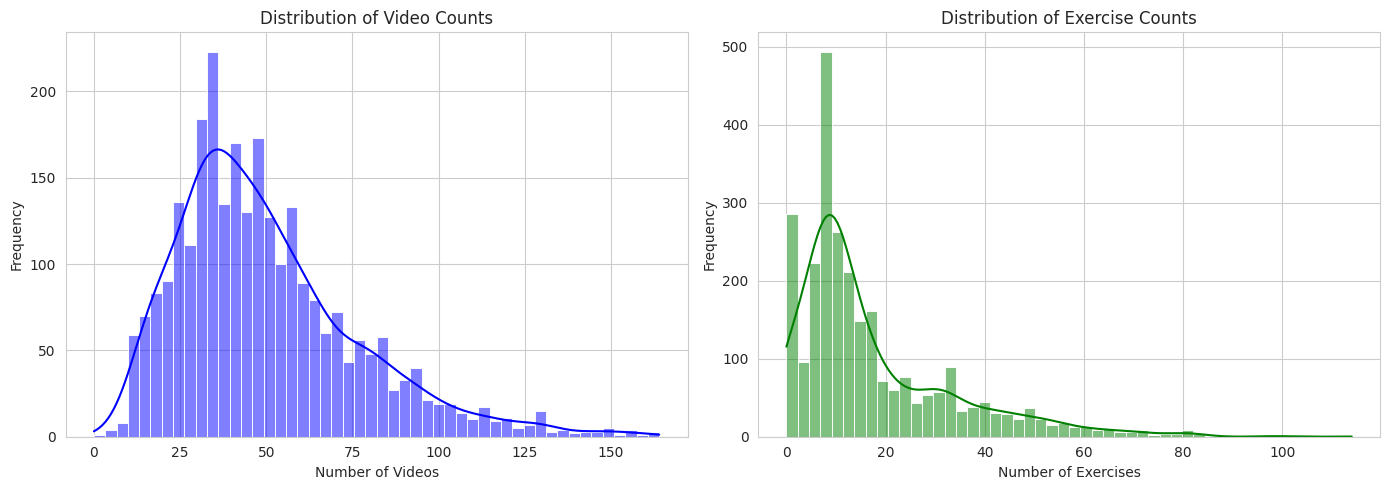

In [ ]:
# Set plot style
sns.set_style("whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for video_count
sns.histplot(grouped_course["video_count"], bins=50, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Distribution of Video Counts")
axes[0].set_xlabel("Number of Videos")
axes[0].set_ylabel("Frequency")

# Histogram for exercise_count
sns.histplot(grouped_course["exercise_count"], bins=50, kde=True, color="green", ax=axes[1])
axes[1].set_title("Distribution of Exercise Counts")
axes[1].set_xlabel("Number of Exercises")
axes[1].set_ylabel("Frequency")

# Show plots
plt.tight_layout()
plt.show()

có những khóa học không có exercise

In [ ]:
grouped_course[grouped_course['exercise_count'] == 0]

,course_id,resource_id_video,chapter_video,resource_id_ex,chapter_ex,video_count,exercise_count
6,C_1123814,"[V_1685267, V_1685268, V_1685269, V_1685270, V...","[0, 0.1, 0.2, 0.3, 1, 1.1, 1.2, 1.3, 1.4, 1.5,...",[],[],37,0
14,C_1328548,"[V_2044287, V_2028205, V_2028206, V_2028207, V...","[0, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,...",[],[],126,0
25,C_1429002,"[V_2174282, V_2174283, V_2174284, V_2174285, V...","[1.1.1, 1.2.1, 1.3.1, 1.4.1, 1.5.1, 1.7.1, 2.1...",[],[],45,0
40,C_1627979,"[V_2841169, V_2841170, V_2841171, V_2841172, V...","[1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1....",[],[],40,0
42,C_1628160,"[V_2842361, V_2842362, V_2842363, V_2842364, V...","[1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1....",[],[],39,0
...,...,...,...,...,...,...,...
2587,C_947262,"[V_1437330, V_1437331, V_1437332, V_1437333, V...","[0, 0.1, 0.2, 0.3, 1, 1.1, 1.2, 1.3, 2, 2.1, 2...",[],[],42,0
2603,C_948075,"[V_1463968, V_1463969, V_1463970, V_1463971, V...","[0, 0.1, 0.1.1, 0.2, 0.2.1, 0.2.2, 0.2.3, 0.2....",[],[],54,0
2650,C_948248,"[V_1473172, V_1473174, V_1473175, V_1473176, V...","[0.1, 1.1, 1.2, 1.1.1, 1.1.2, 1.1.3, 1.2.1, 1....",[],[],49,0
2693,C_948422,"[V_1483875, V_1483879, V_1483883, V_1483886, V...","[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0....",[],[],55,0


In [ ]:
grouped_course = grouped_course[grouped_course['exercise_count'] != 0]

In [ ]:
grouped_course = grouped_course[grouped_course['video_count'] != 0]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


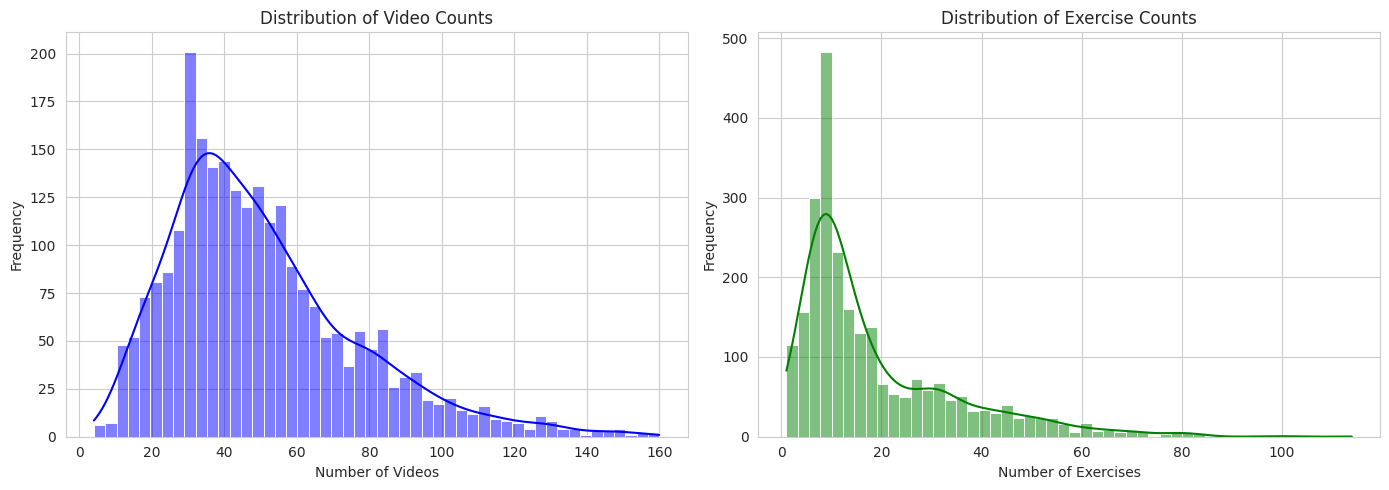

In [ ]:
# Set plot style
sns.set_style("whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for video_count
sns.histplot(grouped_course["video_count"], bins=50, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Distribution of Video Counts")
axes[0].set_xlabel("Number of Videos")
axes[0].set_ylabel("Frequency")

# Histogram for exercise_count
sns.histplot(grouped_course["exercise_count"], bins=50, kde=True, color="green", ax=axes[1])
axes[1].set_title("Distribution of Exercise Counts")
axes[1].set_xlabel("Number of Exercises")
axes[1].set_ylabel("Frequency")

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
# Concatenate video and exercise chapters into a single 'chapter' column and sort the list
grouped_course['chapter'] = grouped_course.apply(lambda row: sorted(row['chapter_video'] + row['chapter_ex']), axis=1)
# Display updated DataFrame
grouped_course

,course_id,resource_id_video,chapter_video,resource_id_ex,chapter_ex,video_count,exercise_count,chapter
0,C_1017355,"[V_1617852, V_1617854, V_1736570, V_1736573, V...","[0, 0.1, 1, 1.1, 1.1.1, 1.2.1, 2, 2.1, 3, 3.1,...","[Ex_1617853, Ex_1617855, Ex_1736572, Ex_173657...","[0.1, 0.1.1, 1.1, 1.1.1, 1.1.2, 1.2.2, 2.1, 2....",19,19,"[0, 0.1, 0.1, 0.1.1, 1, 1.1, 1.1, 1.1.1, 1.1.1..."
1,C_1017419,"[V_1618247, V_1618249, V_1618250, V_1618252, V...","[1.2, 2.1, 2.2, 3.1, 3.2, 4.1, 4.2, 5.1, 5.2, ...","[Ex_1618248, Ex_1618251, Ex_1618254, Ex_161825...","[1.3, 2.3, 3.3, 4.3, 5.3, 6.3, 7.3, 8.3, 9.3]",17,9,"[1.2, 1.3, 2.1, 2.2, 2.3, 3.1, 3.2, 3.3, 4.1, ..."
2,C_1025064,"[V_1622546, V_1622547, V_1622548, V_1622549, V...","[0, 0.1, 0.2, 0.3, 0.3.1, 0.3.2, 0.4, 0.5, 1, ...","[Ex_1622556, Ex_1622566, Ex_1622574, Ex_162258...","[0.6, 1.7, 2.4, 3.2, 4.4, 5.3, 6.4, 7.4, 8.3, ...",89,14,"[0, 0.1, 0.2, 0.3, 0.3.1, 0.3.2, 0.4, 0.5, 0.6..."
3,C_1025076,"[V_1622858, V_1622859, V_1622860, V_1622861, V...","[0, 0.1, 0.2, 0.3, 0.2, 0.2.1, 0.2.2, 0.2.3, 0...","[Ex_1622870, Ex_1622875, Ex_1622876, Ex_1622889]","[0.2.6, 1.2, 1.3, 2.11]",43,4,"[0, 0.1, 0.1, 0.2, 0.2, 0.2.1, 0.2.2, 0.2.3, 0..."
4,C_1025079,"[V_1622989, V_1622990, V_1622991, V_1622992, V...","[1.1.1, 1.2.1, 1.3.1, 1.4.1, 2.1.1, 2.2.1, 2.3...","[Ex_1622993, Ex_1623006, Ex_1623011, Ex_162302...","[1.5, 4.5, 5.5, 7.5, 8.3]",34,5,"[1.1.1, 1.2.1, 1.3.1, 1.4.1, 1.5, 2.1.1, 2.2.1..."
...,...,...,...,...,...,...,...,...
2713,C_949542,"[V_1505188, V_1505190, V_1505192, V_1505194, V...","[0, 0.1, 0.2, 1, 1.1, 1.2, 2, 2.1, 2.2, 2.3, 2...","[Ex_1505189, Ex_1505191, Ex_1505193, Ex_150519...","[0.1, 0.1.1, 0.2.1, 1.1, 1.1.1, 1.2.1, 2.1, 2....",33,31,"[0, 0.1, 0.1, 0.1.1, 0.2, 0.2.1, 1, 1.1, 1.1, ..."
2714,C_955163,"[V_1542335, V_1542336, V_1542337, V_1542338, V...","[0, 0.1, 0.2, 0.3, 1, 2, 2.1, 2.2, 2.3, 2.4, 2...","[Ex_1576375, Ex_1576376, Ex_1545423, Ex_154542...","[0.4, 1.1, 2.19, 3.21, 4.43, 5.12, 6.1]",101,7,"[0, 0.1, 0.2, 0.3, 0.4, 1, 1.1, 2, 2.1, 2.10, ..."
2715,C_956128,"[V_1555005, V_1555006, V_1555007, V_1555010, V...","[0, 0.1, 0.3, 1, 1.1, 1.2, 1.4, 2, 2.1, 2.2, 2...","[Ex_1555008, Ex_1555014, Ex_1555021, Ex_155502...","[0.2, 1.3, 2.4, 3.3, 4.3, 5.2, 6.3]",27,7,"[0, 0.1, 0.2, 0.3, 1, 1.1, 1.2, 1.3, 1.4, 2, 2..."
2716,C_956129,"[V_1555097, V_1555098, V_1555099, V_1555100, V...","[0, 0.1, 0.2, 0.3, 0.1, 0.1.1, 0.1.2, 0.2, 0.2...","[Ex_1555101, Ex_1555106, Ex_1555114, Ex_155511...","[0.5, 0.1.4, 0.2.7, 0.3.3, 1.5, 1.1.2, 1.2.5, ...",73,23,"[0, 0.1, 0.1, 0.1.1, 0.1.2, 0.1.4, 0.2, 0.2, 0..."


In [ ]:
# Function to increment hierarchical chapter numbers and add new chapters when the first part changes
def process_chapters(chapter_list):
    if not chapter_list:
        return [], 0  # Return empty if no chapters exist

    chapter_list = sorted(chapter_list, key=lambda x: list(map(int, x.split('.'))))  # Sort chapters numerically
    new_chapters = []
    previous_first_part = None

    for chapter in chapter_list:
        parts = chapter.split('.')  # Split into hierarchy
        first_part = parts[0]  # Extract first part of the chapter

        # If first part changes, add a new chapter marker
        if first_part != previous_first_part:
            new_chapters.append(first_part)  # Add the first part as a new chapter marker

        previous_first_part = first_part  # Update previous first part for next iteration

    return new_chapters, len(new_chapters)  # Return updated chapters & count

# Apply function to create new chapter column and count
grouped_course[['new_chapter', 'chapter_count']] = grouped_course['chapter'].apply(lambda x: pd.Series(process_chapters(x)))

# Display updated DataFrame
grouped_course

,course_id,resource_id_video,chapter_video,resource_id_ex,chapter_ex,video_count,exercise_count,chapter,new_chapter,chapter_count
0,C_1017355,"[V_1617852, V_1617854, V_1736570, V_1736573, V...","[0, 0.1, 1, 1.1, 1.1.1, 1.2.1, 2, 2.1, 3, 3.1,...","[Ex_1617853, Ex_1617855, Ex_1736572, Ex_173657...","[0.1, 0.1.1, 1.1, 1.1.1, 1.1.2, 1.2.2, 2.1, 2....",19,19,"[0, 0.1, 0.1, 0.1.1, 1, 1.1, 1.1, 1.1.1, 1.1.1...","[0, 1, 2, 3, 4, 5, 6, 7]",8
1,C_1017419,"[V_1618247, V_1618249, V_1618250, V_1618252, V...","[1.2, 2.1, 2.2, 3.1, 3.2, 4.1, 4.2, 5.1, 5.2, ...","[Ex_1618248, Ex_1618251, Ex_1618254, Ex_161825...","[1.3, 2.3, 3.3, 4.3, 5.3, 6.3, 7.3, 8.3, 9.3]",17,9,"[1.2, 1.3, 2.1, 2.2, 2.3, 3.1, 3.2, 3.3, 4.1, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9]",9
2,C_1025064,"[V_1622546, V_1622547, V_1622548, V_1622549, V...","[0, 0.1, 0.2, 0.3, 0.3.1, 0.3.2, 0.4, 0.5, 1, ...","[Ex_1622556, Ex_1622566, Ex_1622574, Ex_162258...","[0.6, 1.7, 2.4, 3.2, 4.4, 5.3, 6.4, 7.4, 8.3, ...",89,14,"[0, 0.1, 0.2, 0.3, 0.3.1, 0.3.2, 0.4, 0.5, 0.6...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",14
3,C_1025076,"[V_1622858, V_1622859, V_1622860, V_1622861, V...","[0, 0.1, 0.2, 0.3, 0.2, 0.2.1, 0.2.2, 0.2.3, 0...","[Ex_1622870, Ex_1622875, Ex_1622876, Ex_1622889]","[0.2.6, 1.2, 1.3, 2.11]",43,4,"[0, 0.1, 0.1, 0.2, 0.2, 0.2.1, 0.2.2, 0.2.3, 0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",10
4,C_1025079,"[V_1622989, V_1622990, V_1622991, V_1622992, V...","[1.1.1, 1.2.1, 1.3.1, 1.4.1, 2.1.1, 2.2.1, 2.3...","[Ex_1622993, Ex_1623006, Ex_1623011, Ex_162302...","[1.5, 4.5, 5.5, 7.5, 8.3]",34,5,"[1.1.1, 1.2.1, 1.3.1, 1.4.1, 1.5, 2.1.1, 2.2.1...","[1, 2, 3, 4, 5, 6, 7, 8]",8
...,...,...,...,...,...,...,...,...,...,...
2713,C_949542,"[V_1505188, V_1505190, V_1505192, V_1505194, V...","[0, 0.1, 0.2, 1, 1.1, 1.2, 2, 2.1, 2.2, 2.3, 2...","[Ex_1505189, Ex_1505191, Ex_1505193, Ex_150519...","[0.1, 0.1.1, 0.2.1, 1.1, 1.1.1, 1.2.1, 2.1, 2....",33,31,"[0, 0.1, 0.1, 0.1.1, 0.2, 0.2.1, 1, 1.1, 1.1, ...","[0, 1, 2, 3, 4, 5]",6
2714,C_955163,"[V_1542335, V_1542336, V_1542337, V_1542338, V...","[0, 0.1, 0.2, 0.3, 1, 2, 2.1, 2.2, 2.3, 2.4, 2...","[Ex_1576375, Ex_1576376, Ex_1545423, Ex_154542...","[0.4, 1.1, 2.19, 3.21, 4.43, 5.12, 6.1]",101,7,"[0, 0.1, 0.2, 0.3, 0.4, 1, 1.1, 2, 2.1, 2.10, ...","[0, 1, 2, 3, 4, 5, 6]",7
2715,C_956128,"[V_1555005, V_1555006, V_1555007, V_1555010, V...","[0, 0.1, 0.3, 1, 1.1, 1.2, 1.4, 2, 2.1, 2.2, 2...","[Ex_1555008, Ex_1555014, Ex_1555021, Ex_155502...","[0.2, 1.3, 2.4, 3.3, 4.3, 5.2, 6.3]",27,7,"[0, 0.1, 0.2, 0.3, 1, 1.1, 1.2, 1.3, 1.4, 2, 2...","[0, 1, 2, 3, 4, 5, 6]",7
2716,C_956129,"[V_1555097, V_1555098, V_1555099, V_1555100, V...","[0, 0.1, 0.2, 0.3, 0.1, 0.1.1, 0.1.2, 0.2, 0.2...","[Ex_1555101, Ex_1555106, Ex_1555114, Ex_155511...","[0.5, 0.1.4, 0.2.7, 0.3.3, 1.5, 1.1.2, 1.2.5, ...",73,23,"[0, 0.1, 0.1, 0.1.1, 0.1.2, 0.1.4, 0.2, 0.2, 0...","[0, 1, 2, 3, 4]",5


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


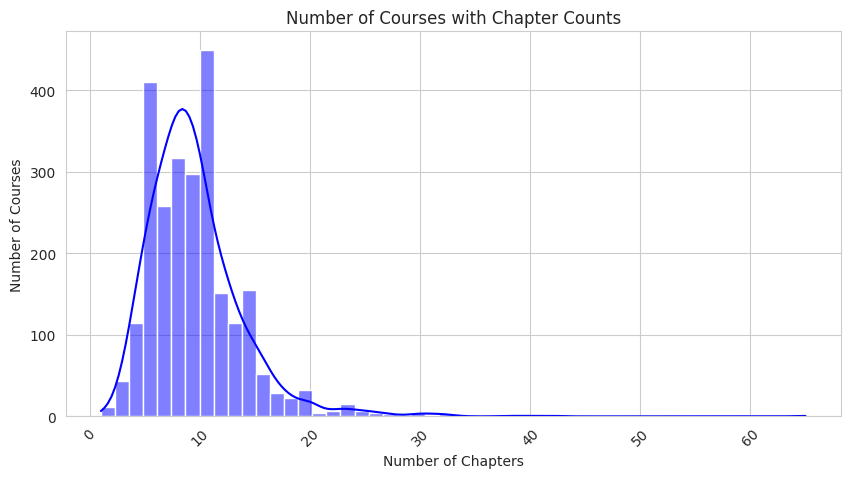

In [ ]:
# Plot bar chart
plt.figure(figsize=(10, 5))
sns.histplot(grouped_course['chapter_count'], bins=50, kde=True, color="blue")
# Labels and title
plt.xlabel('Number of Chapters')
plt.ylabel('Number of Courses')
plt.title('Number of Courses with Chapter Counts')

# Show plot
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [ ]:
grouped_course['chapter_count'].value_counts()

chapter_count
8     317
9     297
10    269
7     258
6     231
11    181
5     179
12    151
13    114
4     114
14     84
15     71
16     52
3      43
17     29
18     23
20     21
19     11
2       9
23      9
22      6
24      6
25      6
26      4
21      4
30      4
27      3
32      3
1       2
31      2
28      1
65      1
29      1
33      1
38      1
40      1
42      1
Name: count, dtype: int64

In [ ]:
# Filter courses where video_count is 0
courses_with_least_chapter = grouped_course[grouped_course['chapter_count'] == 1]

# Print the results
courses_with_least_chapter

,course_id,resource_id_video,chapter_video,resource_id_ex,chapter_ex,video_count,exercise_count,chapter,new_chapter,chapter_count
936,C_2343056,"[V_8810980, V_8810984, V_8810986, V_8810991, V...","[0.1, 0.1.1, 0.2.1, 0.3.1, 0.4.1, 0.5.1, 0.6.1...","[Ex_8810981, Ex_8810985, Ex_8810987, Ex_881099...","[0.2, 0.1.2, 0.2.2, 0.3.2, 0.4.2, 0.5.2, 0.6.2...",13,13,"[0.1, 0.1.1, 0.1.2, 0.10.1, 0.10.3, 0.11.1, 0....",[0],1
1366,C_681679,"[V_211888, V_211889, V_211890, V_211891, V_211...","[3.1.1, 3.3.1, 3.5.1, 3.7.1, 3.8.1, 3.10.1, 3....","[Ex_211911, Ex_211912, Ex_211913, Ex_211914, E...","[3.2, 3.4, 3.6, 3.9, 3.11, 3.13, 3.15, 3.17, 3...",23,18,"[3.1.1, 3.10.1, 3.11, 3.12.1, 3.13, 3.14.1, 3....",[3],1


những khóa học này không tách thành các chương cố đinh

In [ ]:
# Save the cleaned DataFrame to a CSV file
grouped_course.to_csv('filtered_courses.csv', index=False)

print("CSV file saved successfully!")

CSV file saved successfully!


In [ ]:
# Explode resource_id_video and resource_id_ex
df_resources_video_exploded = grouped_course[['course_id', 'resource_id_video']].explode('resource_id_video').rename(columns={'resource_id_video': 'resource_id'})
df_resources_ex_exploded = grouped_course[['course_id', 'resource_id_ex']].explode('resource_id_ex').rename(columns={'resource_id_ex': 'resource_id'})

# Concatenate both DataFrames
df_resources_combined = pd.concat([df_resources_video_exploded, df_resources_ex_exploded])

# Reset index for clarity
df_resources_combined = df_resources_combined.reset_index(drop=True)

# Sort by course_id
df_resources_combined = df_resources_combined.sort_values(by='course_id')

# Display the combined DataFrame
df_resources_combined

,course_id,resource_id
0,C_1017355,V_1617852
126655,C_1017355,Ex_1617883
126654,C_1017355,Ex_1617881
126653,C_1017355,Ex_1617879
126652,C_1017355,Ex_1617877
...,...,...
126599,C_956130,V_6304392
126598,C_956130,V_6304390
126597,C_956130,V_6304388
126610,C_956130,V_6304416


In [ ]:
df_resources_combined.to_csv('course_resource_new_id.csv', index=False)